In [2]:
!pip install matplotlib
!pip install pandas
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
# Load your dataset
file_path = '/Users/joseph/Downloads/Kings Attendance DS Club/Kings_Attendance_Post_Covid.csv'
df = pd.read_csv(file_path)

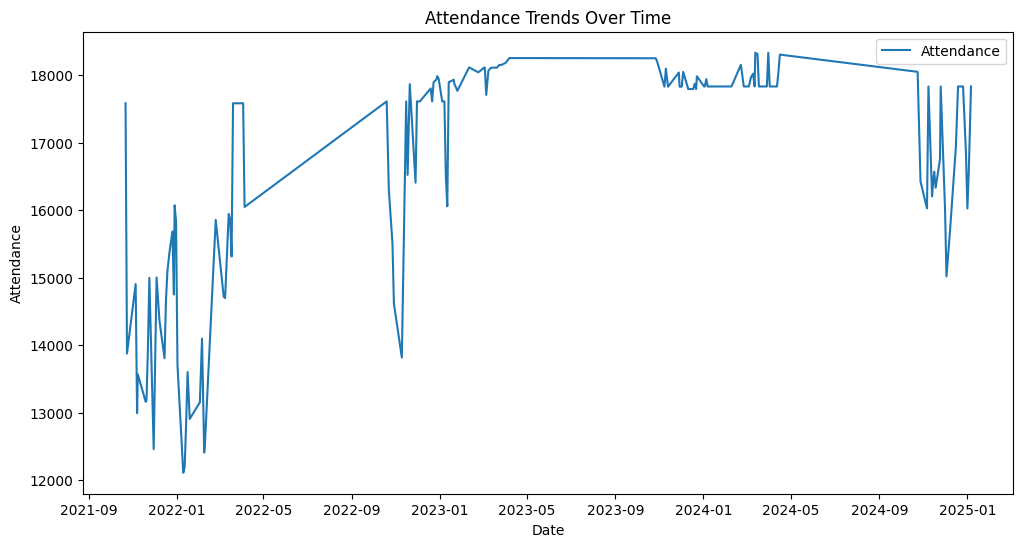

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot attendance over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Attend.'], label='Attendance')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.title('Attendance Trends Over Time')
plt.legend()
plt.show()

/var/folders/fk/22_b41r16kd77_k6t241p88w0000gn/T/ipykernel_36503/2502960574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attendance_by_day.index, y=attendance_by_day.values, palette='viridis')


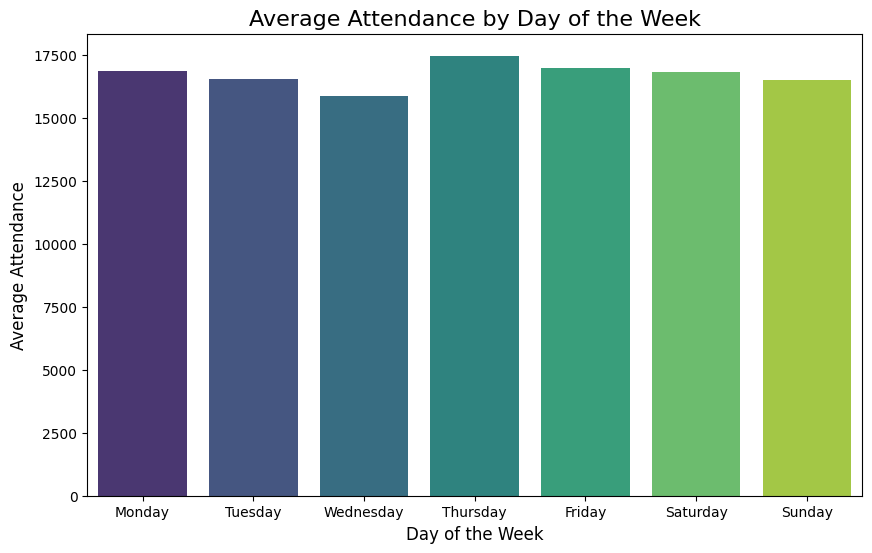

In [7]:
# Group the data by 'Day' and calculate the mean attendance
attendance_by_day = df.groupby('Day')['Attend.'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=attendance_by_day.index, y=attendance_by_day.values, palette='viridis')
plt.title('Average Attendance by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

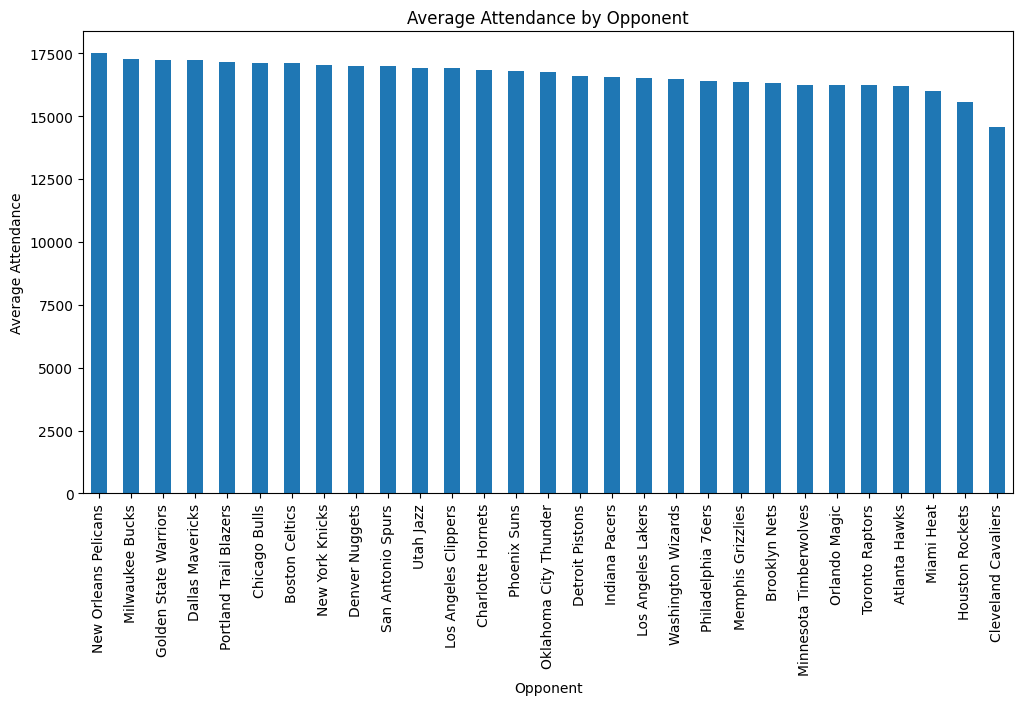

In [8]:
avg_attendance_by_opponent = df.groupby('Opponent')['Attend.'].mean().sort_values(ascending=False)
avg_attendance_by_opponent.plot(kind='bar', figsize=(12, 6), title='Average Attendance by Opponent')
plt.ylabel('Average Attendance')
plt.show()

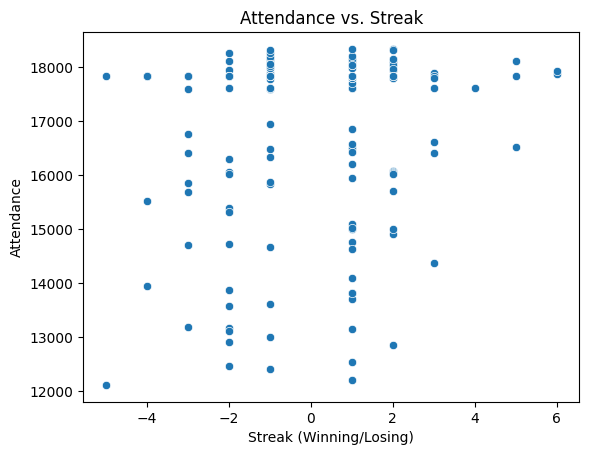

In [9]:
df['StreakValue'] = df['Streak'].apply(lambda x: int(x[1:]) if x.startswith('W') else -int(x[1:]))
sns.scatterplot(x='StreakValue', y='Attend.', data=df)
plt.title('Attendance vs. Streak')
plt.xlabel('Streak (Winning/Losing)')
plt.ylabel('Attendance')
plt.show()

        Date  DaysSinceLastHomeGame
0 2021-10-22                    NaN
1 2021-10-24                    2.0
2 2021-11-05                   12.0
3 2021-11-07                    2.0
4 2021-11-08                    1.0
DaysSinceLastHomeGame
1.0      16968.611111
2.0      16540.907407
3.0      16691.789474
4.0      16824.000000
5.0      15905.428571
6.0      15851.500000
7.0      17039.200000
8.0      17391.250000
9.0      16929.000000
10.0     17830.500000
11.0     14881.750000
12.0     16473.000000
13.0     18153.000000
14.0     15368.000000
15.0     17232.333333
16.0     17971.500000
191.0    18049.000000
197.0    17611.000000
203.0    18250.000000
Name: Attend., dtype: float64


/var/folders/fk/22_b41r16kd77_k6t241p88w0000gn/T/ipykernel_36591/3331747402.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attendance_by_days.index, y=attendance_by_days.values, palette='viridis')


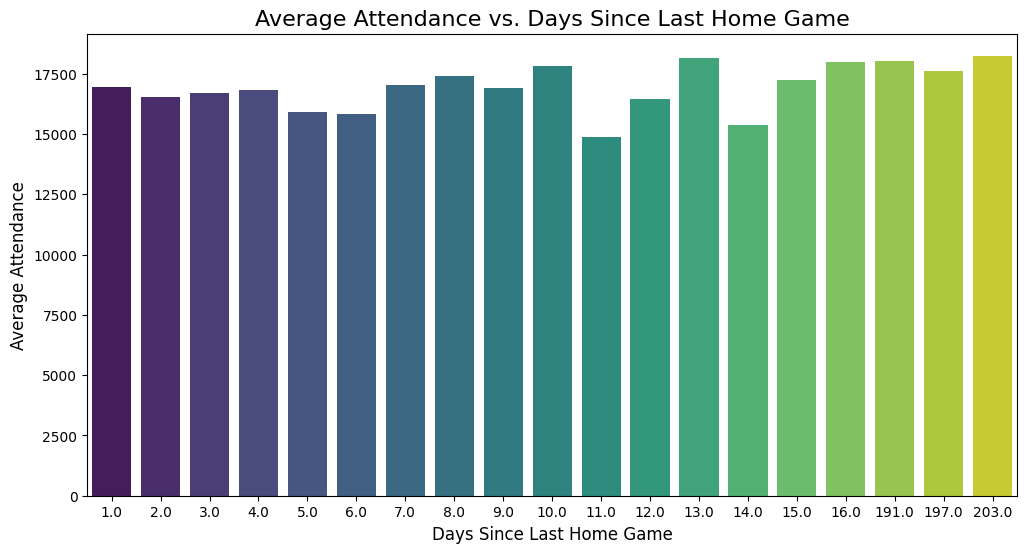

In [8]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date (in case it's not sorted)
df = df.sort_values(by='Date')

# Calculate 'DaysSinceLastHomeGame'
df['DaysSinceLastHomeGame'] = df['Date'].diff().dt.days

# Check the first few rows to ensure 'DaysSinceLastHomeGame' has been calculated
print(df[['Date', 'DaysSinceLastHomeGame']].head())

# Remove rows with NaN values in 'DaysSinceLastHomeGame' (e.g., first row will be NaN)
df_clean = df.dropna(subset=['DaysSinceLastHomeGame'])

# Calculate the average attendance for each 'DaysSinceLastHomeGame'
attendance_by_days = df_clean.groupby('DaysSinceLastHomeGame')['Attend.'].mean()

# Check if the groupby operation produced results
print(attendance_by_days)

# Plot as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=attendance_by_days.index, y=attendance_by_days.values, palette='viridis')
plt.title('Average Attendance vs. Days Since Last Home Game', fontsize=16)
plt.xlabel('Days Since Last Home Game', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()